<a href="https://colab.research.google.com/github/mzamarron/MachineLearning/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Adult Data Set </center>

*Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))*

https://archive.ics.uci.edu/ml/datasets/Adult

```
Prediction task is to determine whether a person makes over 50K a year.
```

***

## Library Import

In [ ]:
import random
import statistics
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from itertools import permutations 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

## Data import

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MachineLearning/Datasets/adult.csv')

## Data exploration

In [ ]:
print('Dataset dimension: ', df.shape)
df.head()

Dataset dimension:  (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# Check for invalid data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Check for invalid data
df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

# Data cleaning

In [ ]:
# Replace invalidad data '?' with the mode of the attribute 
df['workclass'] = df['workclass'].replace('?', df['workclass'].mode()[0])
df['occupation'] = df['occupation'].replace('?',df['occupation'].mode()[0])
df['native-country'] = df['native-country'].replace('?',df['native-country'].mode()[0])
# Remove redundant column
df.drop('educational-num',axis=1, inplace=True)
# Change income notation for easier management
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


# Data visualization

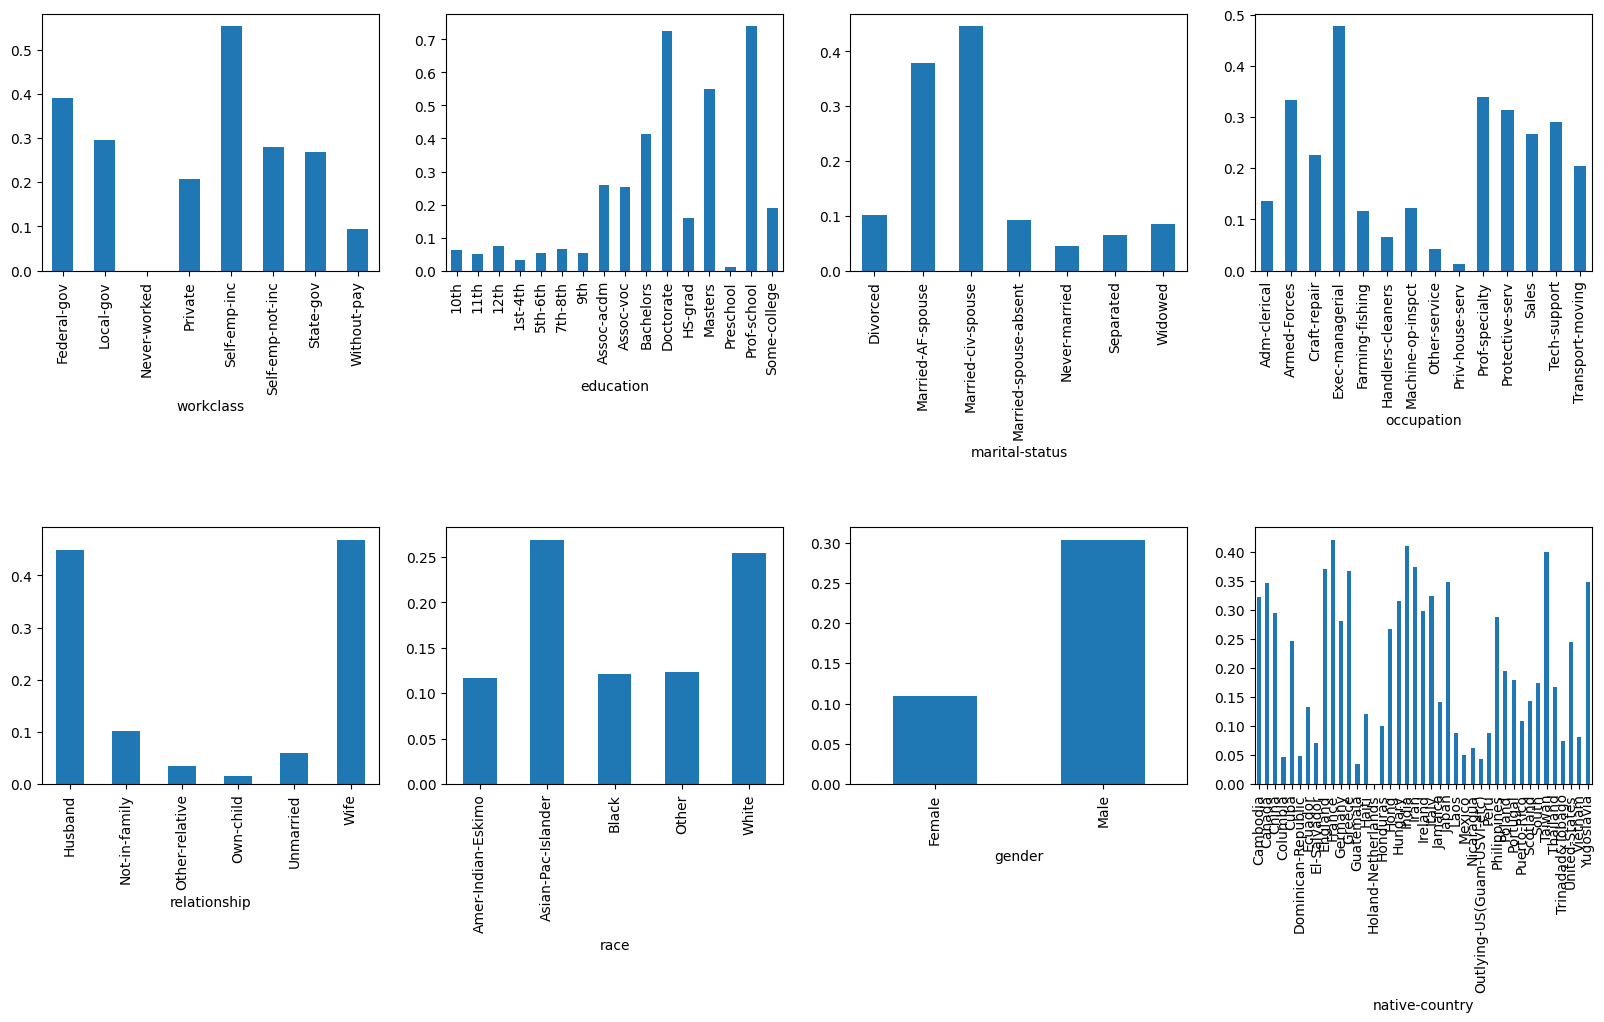

In [ ]:
variables = ['workclass','education','marital-status','occupation','relationship','race','gender', 'native-country']

fig = plt.figure(figsize=(20,10))
axes = []
for i in range(len(variables)):
  axes.append(fig.add_subplot(int(str('24')+str(i+1))))

aux = 0
for var in variables:
  df.groupby(var).income.mean().plot(kind='bar', ax=axes[aux])
  fig.subplots_adjust(hspace=1)
  aux += 1



*Who has a higher chance of earning more than 50K?*

> Data suggest:
* Self-emp-in and Federal-gov workclass groups.
* Adults with an educational background of Prof-school and Doctorate.
* A married couple according to Marital status and relationship charts.
* People with Prof-specialty and Exec-managerial occupation.
* As per the data, an Asian-Pac-Islander or a White.
* Men are more likely to have a higher income.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

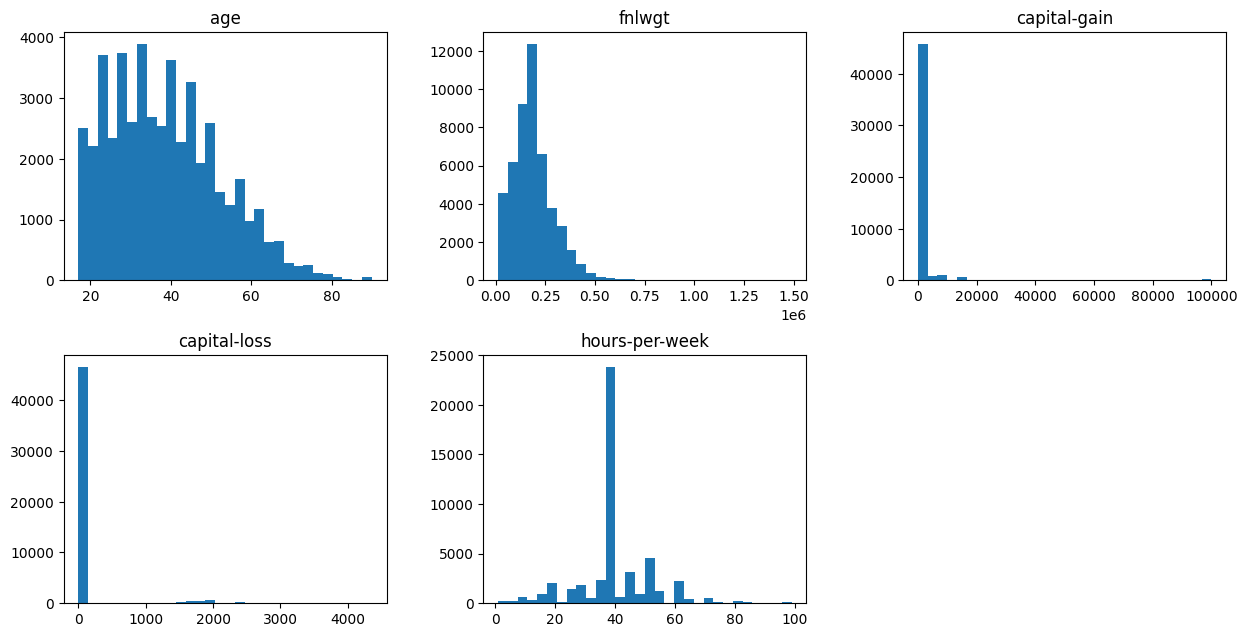

In [ ]:
discrete_var = ['age','fnlwgt','capital-gain', 'capital-loss', 'hours-per-week']
df[discrete_var].hist(bins=30, figsize=(15,20), layout=(5,3), sharex=False, grid=False)

***

# Data preparation

In [ ]:
df_training = df.copy()
df_training = df_training.apply(LabelEncoder().fit_transform)

In [ ]:
df_training.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,1,4,6,3,2,1,0,0,39,38,0
1,21,3,4212,11,2,4,0,4,1,0,0,49,38,0
2,11,1,25340,7,2,10,0,4,1,0,0,39,38,1
3,27,3,11201,15,2,6,0,2,1,98,0,39,38,1
4,1,3,5411,15,4,9,3,4,0,0,0,29,38,0


In [ ]:
X = df_training.iloc[:, :-1].values 
y = df_training.iloc[:,-1:].values 

# Model fitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### LOGISTIC REGRESSION

In [ ]:
log_reg = LogisticRegression()

# Training the model with the data
log_reg.fit(X_train, y_train)
# Predictions on the testing data
y_pred = log_reg.predict(X_test)

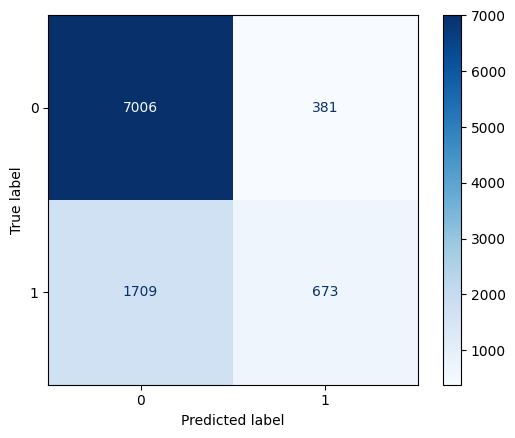


Accuracy: 78.61 %


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

print("\nAccuracy:", round(accuracy_score(y_test, y_pred),4)*100, "%")

### DECISION TREE

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=8,max_depth=10)

# Train Decision Tree Classifer
clf.fit(X_train, y_train)
# Testing the model
y_pred = clf.predict(X_test)

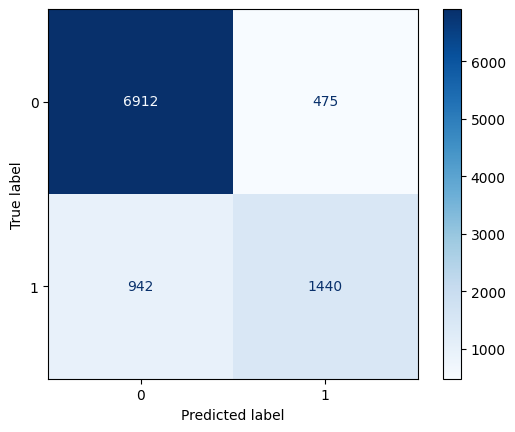


Accuracy: 85.495 %


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

print("\nAccuracy:", round(accuracy_score(y_test, y_pred),5)*100, "%")

### AUTOML = PyCaret

In [ ]:
import pycaret
pycaret.__version__

'3.0.2'

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data=df_training, target = 'income', session_id = 123)

,Description,Value
0,Session id,123
1,Target,income
2,Target type,Binary
3,Original data shape,"(48842, 14)"
4,Transformed data shape,"(48842, 14)"
5,Transformed train set shape,"(34189, 14)"
6,Transformed test set shape,"(14653, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8738,0.9272,0.6454,0.7890,0.7099,0.6302,0.6355,15.0340
lightgbm,Light Gradient Boosting Machine,0.8732,0.9269,0.6449,0.7869,0.7087,0.6287,0.6339,1.0670
xgboost,Extreme Gradient Boosting,0.8715,0.9254,0.6477,0.7782,0.7069,0.6255,0.6299,4.1550
gbc,Gradient Boosting Classifier,0.8655,0.9192,0.5944,0.7918,0.6789,0.5960,0.6059,4.1850
ada,Ada Boost Classifier,0.8594,0.9123,0.6038,0.7598,0.6727,0.5847,0.5911,1.3930
rf,Random Forest Classifier,0.8577,0.9061,0.6087,0.7498,0.6719,0.5823,0.5875,4.6530
et,Extra Trees Classifier,0.8525,0.8962,0.6108,0.7291,0.6645,0.5709,0.5747,4.2490
dt,Decision Tree Classifier,0.8122,0.7479,0.6246,0.6041,0.6141,0.4900,0.4902,0.4640
ridge,Ridge Classifier,0.8055,0.0000,0.2932,0.7350,0.4190,0.3272,0.3773,0.0850
lda,Linear Discriminant Analysis,0.8018,0.8114,0.3049,0.6965,0.4239,0.3257,0.3664,0.1760


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

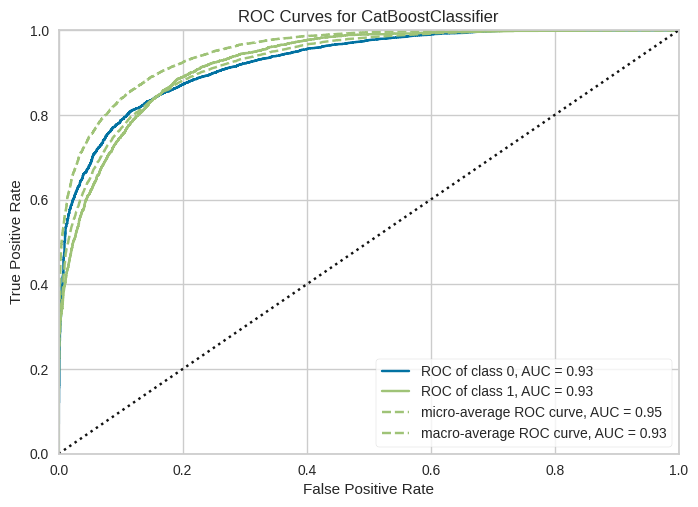

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

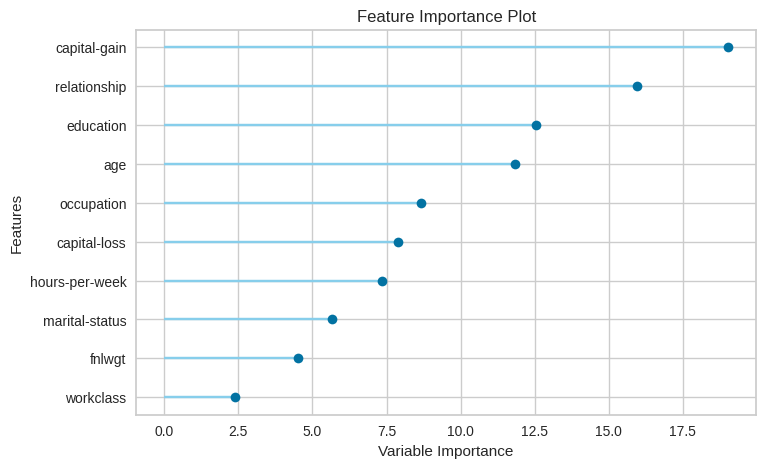

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')